In [160]:
import pandas as pd
from pathlib import Path
import numpy as np
import hvplot.pandas
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [55]:
#importing my data
path = Path('resources/bquxjob_7f17d051_17cdd9f7d2e.csv')
census_df = pd.read_csv(path, index_col = 'geo_id')
census_df.head()

,do_date,total_pop,households,male_pop,female_pop,median_age,male_under_5,male_5_to_9,male_10_to_14,male_15_to_17,...,management_business_sci_arts_employed,sales_office_employed,in_grades_1_to_4,in_grades_5_to_8,in_grades_9_to_12,in_school,in_undergrad_college,speak_only_english_at_home,speak_spanish_at_home,speak_spanish_at_home_low_english
geo_id,,,,,,,,,,,,,,,,,,,,,
42057,2014-01-01,14506.0,5950.0,7360.0,7146.0,45.0,405.0,468.0,384.0,290.0,...,1679.0,1156.0,637.0,665.0,732.0,2767.0,334.0,NaN,NaN,NaN
42105,2014-01-01,16937.0,6523.0,8475.0,8462.0,46.7,444.0,492.0,569.0,327.0,...,1937.0,1075.0,765.0,840.0,846.0,3258.0,316.0,NaN,NaN,NaN
42053,2014-01-01,7351.0,1631.0,5807.0,1544.0,40.4,81.0,51.0,123.0,232.0,...,242.0,146.0,121.0,205.0,345.0,794.0,57.0,NaN,NaN,NaN
42113,2014-01-01,6177.0,2721.0,3253.0,2924.0,53.1,100.0,77.0,100.0,97.0,...,682.0,445.0,136.0,152.0,284.0,845.0,147.0,NaN,NaN,NaN
42031,2014-01-01,38827.0,15824.0,18962.0,19865.0,41.2,1016.0,1155.0,890.0,639.0,...,5649.0,2980.0,1787.0,1398.0,1648.0,9029.0,2994.0,NaN,NaN,NaN


### Question 1

According to this data, what is the total population of PA?  What do you observe about how population is distributed across counties in PA?  



In [56]:
#Finding total population
total_pop_count = census_df['total_pop'].sum()
print(f'The total population of PA: {total_pop_count}')

The total population of PA: 12791181.0


There are three major counties that make up over 28% of the population and the majority of counties are rather small

In [76]:
#graphing Population by County
census_df.hvplot(kind = 'bar', rot = 72, x ='geo_id', y = 'total_pop', title = 'PA Population by County' )

:Bars   [geo_id]   (total_pop)

In [58]:
print(census_df.columns.tolist())

['do_date', 'total_pop', 'households', 'male_pop', 'female_pop', 'median_age', 'male_under_5', 'male_5_to_9', 'male_10_to_14', 'male_15_to_17', 'male_18_to_19', 'male_20', 'male_21', 'male_22_to_24', 'male_25_to_29', 'male_30_to_34', 'male_35_to_39', 'male_40_to_44', 'male_45_to_49', 'male_50_to_54', 'male_55_to_59', 'male_60_to_61', 'male_62_to_64', 'male_65_to_66', 'male_67_to_69', 'male_70_to_74', 'male_75_to_79', 'male_80_to_84', 'male_85_and_over', 'female_under_5', 'female_5_to_9', 'female_10_to_14', 'female_15_to_17', 'female_18_to_19', 'female_20', 'female_21', 'female_22_to_24', 'female_25_to_29', 'female_30_to_34', 'female_35_to_39', 'female_40_to_44', 'female_45_to_49', 'female_50_to_54', 'female_55_to_59', 'female_60_to_61', 'female_62_to_64', 'female_65_to_66', 'female_67_to_69', 'female_70_to_74', 'female_75_to_79', 'female_80_to_84', 'female_85_and_over', 'white_pop', 'population_1_year_and_over', 'population_3_years_over', 'pop_5_years_over', 'pop_15_and_over', 'pop_16_

### Question 2

What is the average poverty rate in PA?  Poverty rate is the number of people in poverty over the total population.

In [71]:
#calculating poverty rates
poverty_rates = census_df['poverty'] / census_df['total_pop']
average_poverty_rate = poverty_rates.mean()

In [74]:
print(f'The average poverty rate in PA: {average_poverty_rate}')

The average poverty rate in PA: 0.12005304602309776


### Question 3

How many Pennsylvanians live in counties where the poverty is higher than the state average?

In [78]:
#Here I add in a new column for poverty rates per county
census_df['poverty_rate'] = poverty_rates
census_df.head()

,do_date,total_pop,households,male_pop,female_pop,median_age,male_under_5,male_5_to_9,male_10_to_14,male_15_to_17,...,sales_office_employed,in_grades_1_to_4,in_grades_5_to_8,in_grades_9_to_12,in_school,in_undergrad_college,speak_only_english_at_home,speak_spanish_at_home,speak_spanish_at_home_low_english,poverty_rate
geo_id,,,,,,,,,,,,,,,,,,,,,
42057,2014-01-01,14506.0,5950.0,7360.0,7146.0,45.0,405.0,468.0,384.0,290.0,...,1156.0,637.0,665.0,732.0,2767.0,334.0,NaN,NaN,NaN,0.113746
42105,2014-01-01,16937.0,6523.0,8475.0,8462.0,46.7,444.0,492.0,569.0,327.0,...,1075.0,765.0,840.0,846.0,3258.0,316.0,NaN,NaN,NaN,0.141229
42053,2014-01-01,7351.0,1631.0,5807.0,1544.0,40.4,81.0,51.0,123.0,232.0,...,146.0,121.0,205.0,345.0,794.0,57.0,NaN,NaN,NaN,0.063529
42113,2014-01-01,6177.0,2721.0,3253.0,2924.0,53.1,100.0,77.0,100.0,97.0,...,445.0,136.0,152.0,284.0,845.0,147.0,NaN,NaN,NaN,0.129675
42031,2014-01-01,38827.0,15824.0,18962.0,19865.0,41.2,1016.0,1155.0,890.0,639.0,...,2980.0,1787.0,1398.0,1648.0,9029.0,2994.0,NaN,NaN,NaN,0.156927


In [90]:
#Here I index into my answer for amount of Pennsyvanians living in counties where poverty is higher than the average
poverty_above_state_average_total = census_df.loc[census_df['poverty_rate'] > average_poverty_rate]['total_pop'].sum()

In [91]:
print(f" The number of Pennsylvanian's living in counties where poverty is above the state average: {poverty_above_state_average_total}")

 The number of Pennsylvanian's living in counties where poverty is above the state average: 5418448.0


### Question 4

Is the poverty rate in PA consistent across all counties or is there variation?  Provide a visualization to explain your answer.



In [94]:
#Scatter plot of poverty rate and population per county
census_df.hvplot(kind = 'scatter', y = 'poverty_rate', x = 'total_pop', title = 'Poverty to Population')

:Scatter   [total_pop]   (poverty_rate)

In [96]:
#bar graph showing poverty rate by county
census_df['poverty_rate'].hvplot(kind = 'bar', rot = 90)

:Bars   [geo_id]   (poverty_rate)

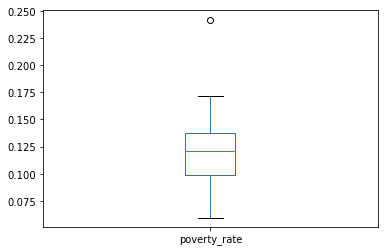

In [109]:
#box plot for poverty rates
census_df['poverty_rate'].plot(kind = 'box')

In [108]:
census_df['poverty_rate'].std()

0.030359392289402685

There appears to be relatively consistent poverty rates with only one major outlier that also happens to be PA's most populated county. There is a low standard deviation of .03 which suggests that most of the data is clustered around the mean and relatively consistent. 

### Question 5

Does there seem to be any relationship between a county’s poverty rate and the percent of population that is over 65?  Include a visualization in your response.

In [145]:
#creating dataframe of people over 65
population_over_65 = census_df.iloc[:,[23,24,25,26,27,28,46,47,48,49,50,51]]
population_over_65.head()

,male_65_to_66,male_67_to_69,male_70_to_74,male_75_to_79,male_80_to_84,male_85_and_over,female_65_to_66,female_67_to_69,female_70_to_74,female_75_to_79,female_80_to_84,female_85_and_over
geo_id,,,,,,,,,,,,
42057,156.0,271.0,428.0,283.0,168.0,107.0,194.0,316.0,367.0,308.0,214.0,180.0
42105,258.0,326.0,494.0,347.0,173.0,209.0,266.0,396.0,422.0,376.0,266.0,327.0
42053,127.0,138.0,258.0,183.0,99.0,60.0,87.0,165.0,192.0,191.0,47.0,79.0
42113,84.0,158.0,228.0,156.0,79.0,94.0,103.0,143.0,232.0,161.0,95.0,132.0
42031,437.0,715.0,736.0,571.0,444.0,358.0,462.0,719.0,887.0,767.0,615.0,549.0


In [150]:
#adding new column over population over 65 to main dataframe
census_df['pop_over_65'] = population_over_65.transpose().sum()
census_df.head()

,do_date,total_pop,households,male_pop,female_pop,median_age,male_under_5,male_5_to_9,male_10_to_14,male_15_to_17,...,in_grades_1_to_4,in_grades_5_to_8,in_grades_9_to_12,in_school,in_undergrad_college,speak_only_english_at_home,speak_spanish_at_home,speak_spanish_at_home_low_english,poverty_rate,pop_over_65
geo_id,,,,,,,,,,,,,,,,,,,,,
42057,2014-01-01,14506.0,5950.0,7360.0,7146.0,45.0,405.0,468.0,384.0,290.0,...,637.0,665.0,732.0,2767.0,334.0,NaN,NaN,NaN,0.113746,2992.0
42105,2014-01-01,16937.0,6523.0,8475.0,8462.0,46.7,444.0,492.0,569.0,327.0,...,765.0,840.0,846.0,3258.0,316.0,NaN,NaN,NaN,0.141229,3860.0
42053,2014-01-01,7351.0,1631.0,5807.0,1544.0,40.4,81.0,51.0,123.0,232.0,...,121.0,205.0,345.0,794.0,57.0,NaN,NaN,NaN,0.063529,1626.0
42113,2014-01-01,6177.0,2721.0,3253.0,2924.0,53.1,100.0,77.0,100.0,97.0,...,136.0,152.0,284.0,845.0,147.0,NaN,NaN,NaN,0.129675,1665.0
42031,2014-01-01,38827.0,15824.0,18962.0,19865.0,41.2,1016.0,1155.0,890.0,639.0,...,1787.0,1398.0,1648.0,9029.0,2994.0,NaN,NaN,NaN,0.156927,7260.0


In [156]:
#creating new df of population over 65, total population, and poverty rate
pop_pov_65 = pd.concat([census_df['total_pop'], census_df['poverty_rate'], census_df['pop_over_65']], join = 'inner', axis = 1)
pop_pov_65.corr()

,total_pop,poverty_rate,pop_over_65
total_pop,1.000000,0.078809,0.986013
poverty_rate,0.078809,1.000000,0.001637
pop_over_65,0.986013,0.001637,1.000000


In [175]:
#comparing poverty rates in total population and population over 65
census_df.hvplot(kind = 'scatter', x = 'pop_over_65', y = 'poverty_rate') + census_df.hvplot(kind = 'scatter', x = 'total_pop', y = 'poverty_rate', color = 'red')

:Layout
   .Scatter.I  :Scatter   [pop_over_65]   (poverty_rate)
   .Scatter.II :Scatter   [total_pop]   (poverty_rate)

I do not see a relationship between a county's population over 65 and their poverty rate. Population over 65 had a weaker correlation (.0016) than that of total population and poverty rate (.0788)

### Question 6

How many households are on public assistance or food stamps in PA?

In [181]:
#Getting the sum of people needing assistance or food stamps
food_stamp_total = census_df['households_public_asst_or_food_stamps'].sum()

In [185]:
#Getting the 
percent_households_on_food_stamps = (census_df['households_public_asst_or_food_stamps'] / census_df['households']).mean()

In [188]:
print(f' Number of households on public assistance/food stamps in PA: {food_stamp_total}')
print(f' Percent of households on public assistance/food stamps in PA: %{percent_households_on_food_stamps * 100}')

 Number of households on public assistance/food stamps in PA: 700759.0
 Percent of households on public assistance/food stamps in PA: %13.672614664310846


### Question 7

In looking at the county level data for poverty and for public assistance/food stamps, are there any counties where there might be a large ‘gap’, meaning that county has more people in poverty who have not enrolled in benefits, compared to other counties?  What assumptions do you need to make to answer this question?
(NOTE: Generally people qualify for public assistance or food stamps at or below 185% of the poverty line. )



In [193]:
census_df['poverty']

geo_id
42057      1650.0
42105      2392.0
42053       467.0
42113       801.0
42031      6093.0
           ...   
42013     17645.0
42133     43381.0
42101    380873.0
42003    144842.0
42045     54468.0
Name: poverty, Length: 67, dtype: float64

In [194]:
census_df['households_public_asst_or_food_stamps']

geo_id
42057       862.0
42105       949.0
42053       252.0
42113       333.0
42031      2266.0
           ...   
42013      8690.0
42133     20198.0
42101    159286.0
42003     70064.0
42045     24198.0
Name: households_public_asst_or_food_stamps, Length: 67, dtype: float64

In [226]:
#Graph showing large gap between people in poverty (blue) and people using assistance(red)
census_df.hvplot(
                        y=['poverty', 'households_public_asst_or_food_stamps'],
                        kind="bar",
                        height=500, width=1200,
                        #ylim=(0, 4),
                        ylabel="People in Poverty, People Using Assistance",
                        title="People in Poverty VS Assistance Being Used Per County",
                        legend = True
)

:Bars   [geo_id,Variable]   (value)

In [230]:
q_7_df = pd.concat([census_df['poverty'],census_df['households_public_asst_or_food_stamps']], join = 'inner', axis = 1)

In [261]:
#Creating new column for percent of people using assistance who qualify
q_7_df['usage_rate'] = census_df['households_public_asst_or_food_stamps']/census_df['poverty']
#Sort Values showing lowest usage rate to highest usage rate
q_7_df.sort_values(by = 'usage_rate', ascending = True, inplace = True)
q_7_df.head()

,poverty,households_public_asst_or_food_stamps,usage_rate
geo_id,,,
42027,26301.0,4337.0,0.164899
42029,34217.0,9726.0,0.284245
42067,2876.0,1016.0,0.353268
42063,13430.0,4857.0,0.361653
42037,8800.0,3183.0,0.361705


In [259]:
#Graphing 20 lowest usage rates  
q_7_df.nsmallest(20, 'usage_rate').hvplot(kind ='bar', y = 'usage_rate', x = 'geo_id', rot = 90, ylim = (0,.7))

:Bars   [geo_id]   (usage_rate)

Assuming everyone within the 'Poverty' column qualifies for assitance this is the results. County #42027 has the lowest usage rate by far of 16.5%. From there it is a gradual upslope to the highest usage rate of 60.9% from county #42073. It is clear that some counties are not maximizing the possible assisatnce that is avaiable to them.